# focal plane plot

In [94]:
'''
 Load data. Input files defined in yaml files (destest_bpz.yaml, destest_metacal.yaml,destest_gold.yaml)
 It requires destest : 
 https://github.com/des-science/destest
 
 catalogs (to be specified in the yaml files):
 

 I didn't manage to run the destest Calibrator. This means that if you directly load R1 and R2 from the catalog,
 they are only the respones of the sample and neglect the response of the selection (which is usually few %).
 The solution I got was to load the columns without selection (uncut=True)
 and apply the response and selection by myself.
'''



import sys
from routines import *
import numpy as np



# ******************************************************************
#                              INPUT
# ******************************************************************
nside = 1024  


# output folders ***************
name_folder_x = '/global/cscratch1/sd/mgatti/Cosmic_shear/Additive_mastercat_04_20/'


if not os.path.exists(name_folder_x):
    os.mkdir(name_folder_x)

print ("done")


meanes1a = np.zeros((2000,2000))
meanes2a = np.zeros((2000,2000))
counta = np.zeros((2000,2000))

meanes1a = np.zeros((500,500))
meanes2a = np.zeros((500,500))
counta = np.zeros((500,500))
for iii in range(100):
    path_matched_catalog_i = "//global/cscratch1/sd/mgatti/Cosmic_shear/Additive_mastercat_04_20//highres_meanee_{0}".format(iii)

    meanes1,meanes2,count=load_obj(path_matched_catalog_i)
    meanes1a+=meanes1
    meanes2a+=meanes2
    counta+=count
    

    
#merging a bit ***
size, res = 250,2
Ameanes1a = np.zeros((size,size))
Ameanes2a = np.zeros((size,size))
Acounta = np.zeros((size,size))
for iii in range(size):
    for jjj in range(size):
        Ameanes1a[iii,jjj] = np.sum(meanes1a[(iii)*res:(iii+1)*res,:][:,(jjj)*res:(jjj+1)*res])
        Ameanes2a[iii,jjj] = np.sum(meanes2a[(iii)*res:(iii+1)*res,:][:,(jjj)*res:(jjj+1)*res])
        Acounta[iii,jjj] = np.sum(counta[(iii)*res:(iii+1)*res,:][:,(jjj)*res:(jjj+1)*res])
                                    
            
            
#merging a bit ***
size, res = 100,5
Bmeanes1a = np.zeros((size,size))
Bmeanes2a = np.zeros((size,size))
Bcounta = np.zeros((size,size))
for iii in range(size):
    for jjj in range(size):
        Bmeanes1a[iii,jjj] = np.sum(meanes1a[(iii)*res:(iii+1)*res,:][:,(jjj)*res:(jjj+1)*res])
        Bmeanes2a[iii,jjj] = np.sum(meanes2a[(iii)*res:(iii+1)*res,:][:,(jjj)*res:(jjj+1)*res])
        Bcounta[iii,jjj] = np.sum(counta[(iii)*res:(iii+1)*res,:][:,(jjj)*res:(jjj+1)*res])
                                    

done


/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]


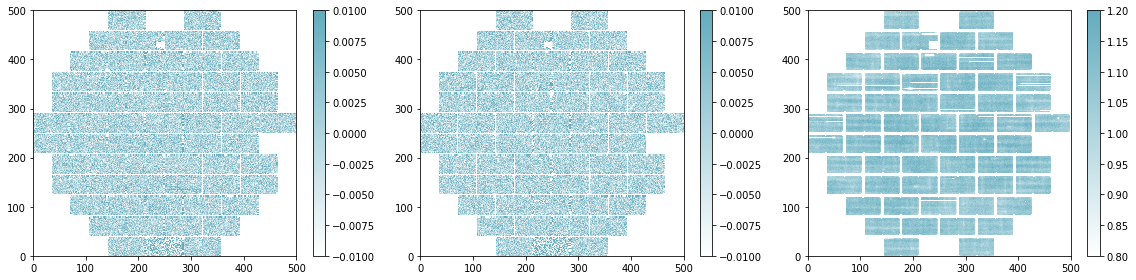

In [80]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['#601A4A', '#EE442F','#63ACBE']

des_c1_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', colors[2]])))


fig, ax = plt.subplots(1, 3, sharex='all',figsize=(16,4.))#, sharey='row')
yy = (meanes1a/counta)
#yy[counta<1000] = np.nan
pcm = ax[0].pcolormesh(yy,vmin=-0.01,vmax=0.01,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[0],cmap=des_c1_cmap)
yy = (meanes2a/counta)
#yy[counta<1000] = np.nan
pcm = ax[1].pcolormesh(yy,vmin=-0.01,vmax=0.01,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[1],cmap=des_c1_cmap)
yy = counta/np.mean(counta[counta!=0].flatten())
pcm = ax[2].pcolormesh(yy,vmin=0.8,vmax=1.2,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[2],cmap=des_c1_cmap)
plt.show()

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':


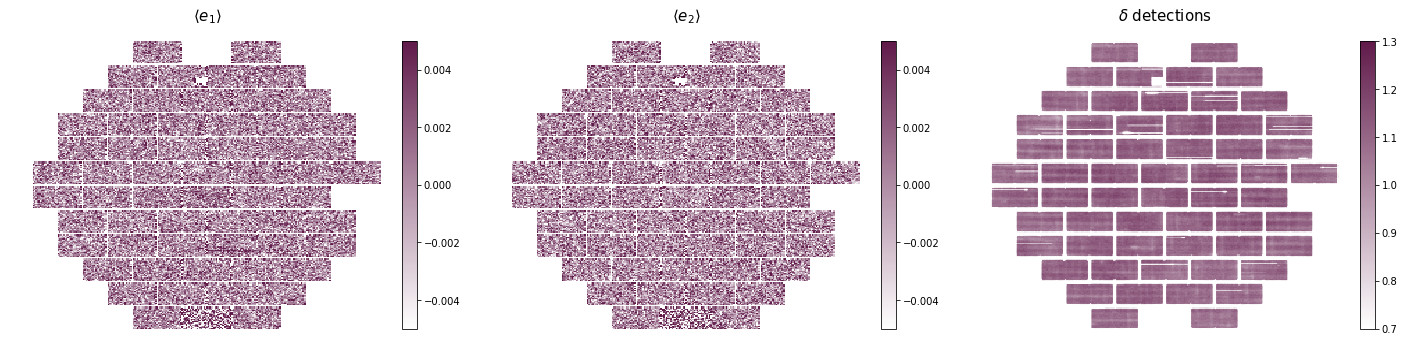

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in divide
/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


In [107]:
# 250
dictt = dict()
from matplotlib.colors import LinearSegmentedColormap
colors = ['#601A4A', '#EE442F','#63ACBE']
des_c1_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', colors[0]])))

fig, ax = plt.subplots(1, 3, sharex='all',figsize=(20,5.))#, sharey='row')
yy = (Ameanes1a/Acounta)
#yy[counta<1000] = np.nan
pcm = ax[0].pcolormesh(yy,vmin=-0.005,vmax=0.005,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[0],cmap=des_c1_cmap)
yy = (Ameanes2a/Acounta)
#yy[counta<1000] = np.nan
pcm = ax[1].pcolormesh(yy,vmin=-0.005,vmax=0.005,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[1],cmap=des_c1_cmap)
yy = Acounta/np.mean(Acounta[Acounta!=0].flatten())
pcm = ax[2].pcolormesh(yy,vmin=0.7,vmax=1.3,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[2],cmap=des_c1_cmap)
ax[0].set_title(r'$\langle e_1 \rangle$', size=15, y =1.05)
ax[1].set_title(r'$\langle e_2 \rangle$', size=15, y =1.05)
ax[2].set_title(r'$\delta$ detections', size=15, y =1.05)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

dictt['e1'] = (Ameanes1a/Acounta)
dictt['e2'] = (Ameanes2a/Acounta)
dictt['counts'] = yy

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys
/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


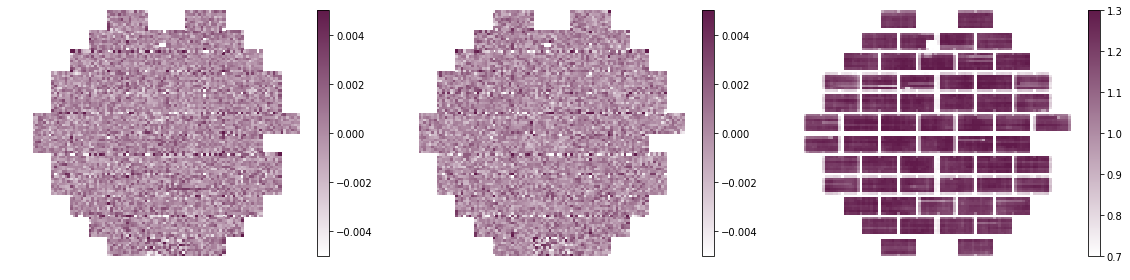

In [98]:
# 100
from matplotlib.colors import LinearSegmentedColormap
colors = ['#601A4A', '#EE442F','#63ACBE']
des_c1_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', colors[0]])))

fig, ax = plt.subplots(1, 3, sharex='all',figsize=(16,4.))#, sharey='row')
yy = (Bmeanes1a/Bcounta)
#yy[counta<1000] = np.nan
pcm = ax[0].pcolormesh(yy,vmin=-0.005,vmax=0.005,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[0],cmap=des_c1_cmap)
yy = (Bmeanes2a/Bcounta)
#yy[counta<1000] = np.nan
pcm = ax[1].pcolormesh(yy,vmin=-0.005,vmax=0.005,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[1],cmap=des_c1_cmap)
yy = Bcounta/np.mean(Bcounta[Bcounta!=0].flatten())
pcm = ax[2].pcolormesh(yy,vmin=0.7,vmax=1.3,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[2],cmap=des_c1_cmap)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [137]:
# now the ccds averaged *********

meanes1a = np.zeros((500,500))
meanes2a = np.zeros((500,500))
counta = np.zeros((500,500))


for iii in range(100):
    path = "//global/cscratch1/sd/mgatti/Cosmic_shear/Additive_mastercat_04_20//highres_meanee_ccd4_{0}".format(iii)
   
    meanes1,meanes2,count, _,_,_=load_obj(path)
    meanes1a+=meanes1
    meanes2a+=meanes2
    counta+=count    
    
    
#merging a bit ***
sizey, resy = 125,4
sizex, resx = 250,2
Ameanes1a = np.zeros((sizex,sizey))
Ameanes2a = np.zeros((sizex,sizey))
Acounta = np.zeros((sizex,sizey))
for iii in range(sizex):
    for jjj in range(sizey):
        Ameanes1a[iii,jjj] = np.sum(meanes1a[(iii)*resx:(iii+1)*resx,:][:,(jjj)*resy:(jjj+1)*resy])
        Ameanes2a[iii,jjj] = np.sum(meanes2a[(iii)*resx:(iii+1)*resx,:][:,(jjj)*resy:(jjj+1)*resy])
        Acounta[iii,jjj] = np.sum(counta[(iii)*resx:(iii+1)*resx,:][:,(jjj)*resy:(jjj+1)*resy])
                                    
            

 
        
#merging a bit ***
sizey, resy = 5,100
sizex, resx = 5,100
Bmeanes1a = np.zeros((sizex,sizey))
Bmeanes2a = np.zeros((sizex,sizey))
Bcounta = np.zeros((sizex,sizey))
for iii in range(sizex):
    for jjj in range(sizey):
        Bmeanes1a[iii,jjj] = np.sum(meanes1a[(iii)*resx:(iii+1)*resx,:][:,(jjj)*resy:(jjj+1)*resy])
        Bmeanes2a[iii,jjj] = np.sum(meanes2a[(iii)*resx:(iii+1)*resx,:][:,(jjj)*resy:(jjj+1)*resy])
        Bcounta[iii,jjj] = np.sum(counta[(iii)*resx:(iii+1)*resx,:][:,(jjj)*resy:(jjj+1)*resy])
                                    
            
        

(250, 125)

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


(0.0, 250.0, 0.0, 125.0)

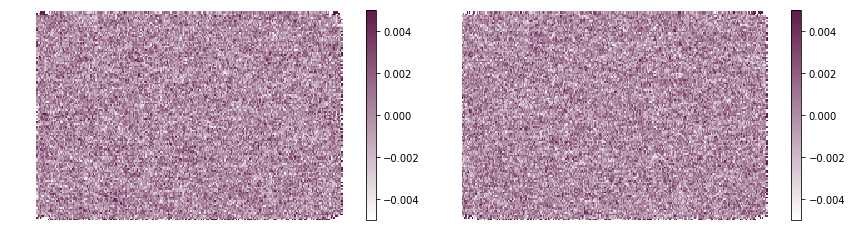

In [146]:
fig, ax = plt.subplots(1, 2, sharex='all',figsize=(12,3.5))#, sharey='row')
yy = Ameanes1a/Acounta
pcm = ax[0].pcolormesh(yy.T,vmin=-0.005,vmax=0.005,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[0],cmap=des_c1_cmap)
yy=Ameanes2a/Acounta
pcm = ax[1].pcolormesh(yy.T,vmin=-0.005,vmax=0.005,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[1],cmap=des_c1_cmap)
ax[0].axis('off')
ax[1].axis('off')

dictt['e1_ccd'] = (Ameanes1a/Acounta)
dictt['e2_ccd'] = (Ameanes2a/Acounta)
dictt['counts_ccd'] = Acounta

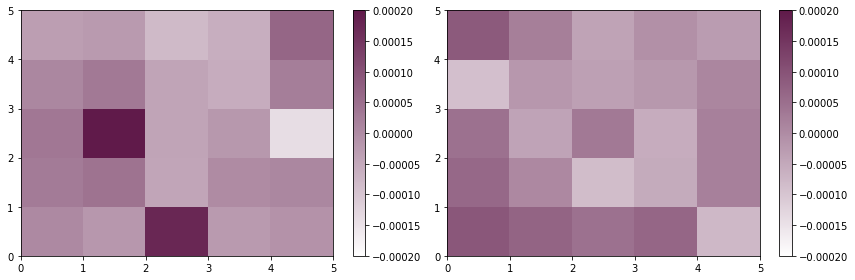

In [141]:
fig, ax = plt.subplots(1, 2, sharex='all',figsize=(12,4.))#, sharey='row')
yy =Bmeanes1a/Bcounta
pcm = ax[0].pcolormesh(yy,vmin=-0.0002,vmax=0.0002,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[0],cmap=des_c1_cmap)
yy=Bmeanes2a/Bcounta
pcm = ax[1].pcolormesh(yy,vmin=-0.0002,vmax=0.0002,cmap=des_c1_cmap)
fig.colorbar(pcm, ax=ax[1],cmap=des_c1_cmap)

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


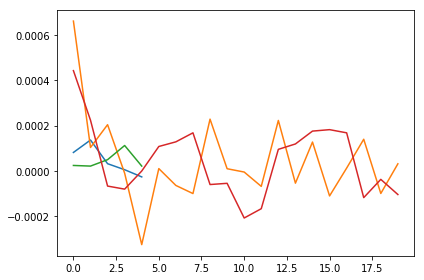

In [132]:
yy = Ameanes1a/Acounta
yy[yy!=yy]=0.
plt.plot(np.mean(np.mean(yy,axis=0).reshape(20,5),axis=0))
plt.plot(np.mean(np.mean(yy,axis=0).reshape(20,5),axis=1))
plt.plot(np.mean(np.mean(yy,axis=1).reshape(20,5),axis=0))
plt.plot(np.mean(np.mean(yy,axis=1).reshape(20,5),axis=1))